# Gun Laws

Let's investigate how the evolution of gun restriction laws is related to crime activity.

## Environment Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(style='whitegrid', rc={'axes.grid' : False})

In [56]:
# load crime data
crimes_df = pd.read_pickle('data/processed_data.pkl')

## Explore gun-related crimes

In [4]:
# IUCR crimes codes related to 'handgun' or 'firearm'
iucr_firearms = [
    '0261','0262','0271','0272','031A','031B',
    '033A','033B','041A','041B','0450','0451',
    '0480','0481','051A','051B','0550','0551',
    '141A','141B','0261','0262','0271','0272',
    '031A','031B','033A','033B','051A','051B',
    '0550','0551','0555','0556','041A','041B',
    '0450','0451','0480','0481','0488','0489',
    '0490','0491','141A','141B','142A','142B',
    '1435','143A','143B','1450','1460','1477','5008'
]

In [57]:
firearm_crimes = crimes_df[crimes_df['IUCR'].isin(iucr_firearms)]

In [80]:
crimes_df.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On', 'Latitude',
       'Longitude'],
      dtype='object')

In [82]:
crimes_df.loc[crimes_df['Primary Type'] == 'HOMICIDE']['FBI Code'].unique()

array(['01A', '01B'], dtype=object)

In [79]:
# look up mentions of gun or firearm in secondary description for homicide
crimes_df.loc[crimes_df['Primary Type'] == 'HOMICIDE']['Description'].unique()

array(['FIRST DEGREE MURDER', 'RECKLESS HOMICIDE',
       'INVOLUNTARY MANSLAUGHTER'], dtype=object)

### Monthly

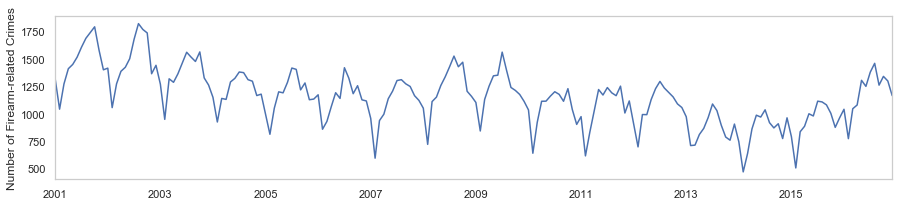

In [58]:
monthly_firearm_crimes = firearm_crimes.resample('M').size()
monthly_firearm_crimes.plot.line(figsize=(15,3))
plt.ylabel('Number of Firearm-related Crimes');

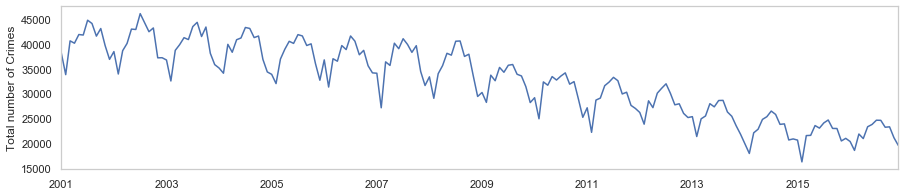

In [59]:
monthly_crimes_df = crimes_df.resample('M').size()
monthly_crimes_df.plot.line(figsize=(15,3));
plt.ylabel('Total number of Crimes');

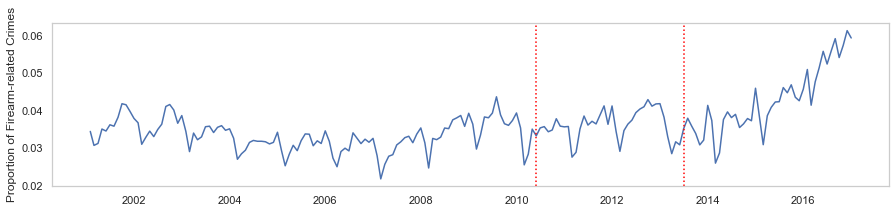

In [60]:
plt.figure(figsize=(15,3))
plt.plot(monthly_firearm_crimes/monthly_crimes_df)
plt.ylabel('Proportion of Firearm-related Crimes');
plt.axvline(x='2010-6', color='red', linestyle=':');
plt.axvline(x='2013-7', color='red', linestyle=':');

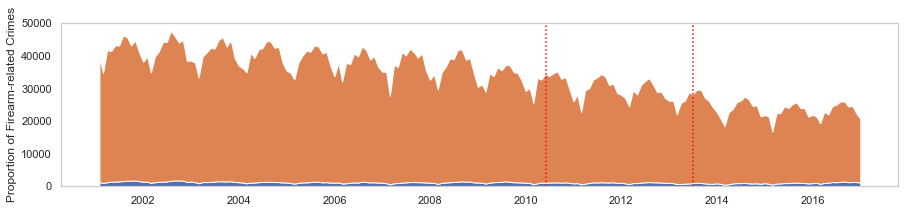

In [61]:
plt.figure(figsize=(15,3))
plt.stackplot(monthly_crimes_df.index, [monthly_firearm_crimes, monthly_crimes_df])
plt.ylabel('Proportion of Firearm-related Crimes');
plt.axvline(x='2010-6', color='red', linestyle=':');
plt.axvline(x='2013-7', color='red', linestyle=':');

### Yearly

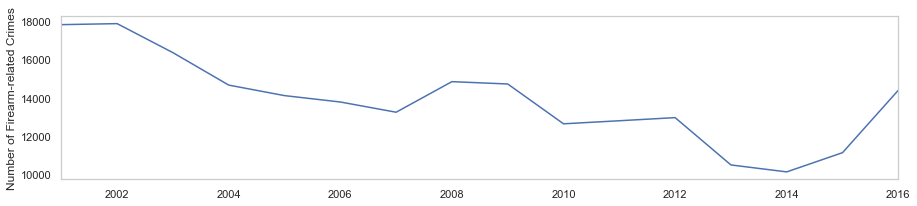

In [62]:
yearly_firearm_crimes = firearm_crimes.resample('Y').size()
yearly_firearm_crimes.name = 'Firearm Crimes'
yearly_firearm_crimes.plot.line(figsize=(15,3))
plt.ylabel('Number of Firearm-related Crimes');

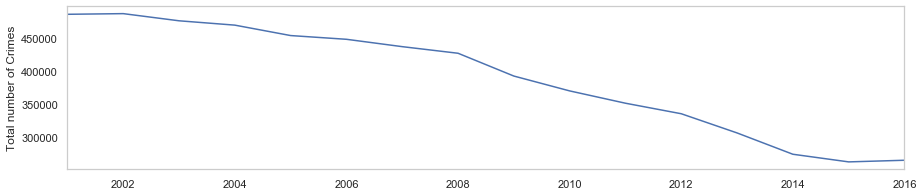

In [63]:
yearly_crimes_df = crimes_df.resample('Y').size()
yearly_crimes_df.name = 'Crimes per Year'
yearly_crimes_df.plot.line(figsize=(15,3));
plt.ylabel('Total number of Crimes');

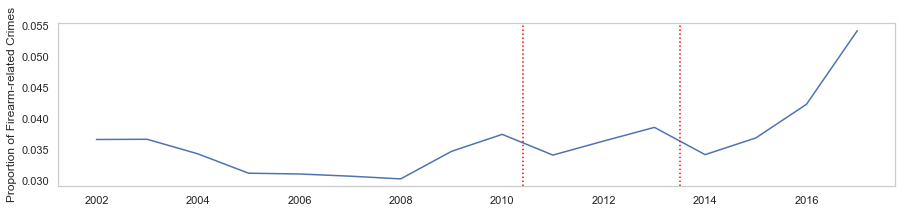

In [64]:
plt.figure(figsize=(15,3))
plt.plot(yearly_firearm_crimes/yearly_crimes_df)
plt.ylabel('Proportion of Firearm-related Crimes');
plt.axvline(x='2010-6', color='red', linestyle=':');
plt.axvline(x='2013-7', color='red', linestyle=':');

### Export data

In [74]:
export_chicago = pd.merge(yearly_crimes_df, yearly_firearm_crimes, left_index=True, right_index=True)
export_chicago['Proportion'] = export_chicago['Firearm Crimes']/export_chicago['Crimes per Year']
export_chicago.index = export_chicago.index.year
export_chicago.index.name = 'Year'
export_chicago.to_csv('data/Gun Crimes in Chicago.csv')

## Other cities

### Los Angeles

In [70]:
la_crime = pd.read_csv('data/external/gun crimes/LA_Crime_Data_from_2010_to_Present.csv', index_col='DATE OCC', parse_dates=True)
la_crime.sort_index(inplace=True)
la_crime.head()

,DR_NO,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DATE OCC,,,,,,,,,,,,,,,,,,,,,
2010-01-01,101204059,01/01/2010 12:00:00 AM,1320,12,77th Street,1265,2,900,VIOLATION OF COURT ORDER,0906 1814 2000 2002,...,IC,Invest Cont,900.0,NaN,NaN,NaN,1400 W 85TH ST,NaN,33.9610,-118.3003
2010-01-01,100604532,01/08/2010 12:00:00 AM,100,6,Hollywood,643,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,1700 N FULLER AV,NaN,34.1016,-118.3489
2010-01-01,141519961,11/03/2014 12:00:00 AM,1000,15,N Hollywood,1557,2,354,THEFT OF IDENTITY,0100 1822,...,IC,Invest Cont,354.0,NaN,NaN,NaN,4900 VINELAND AV,NaN,34.1598,-118.3704
2010-01-01,141513816,07/10/2014 12:00:00 AM,1,15,N Hollywood,1526,2,354,THEFT OF IDENTITY,1822,...,IC,Invest Cont,354.0,NaN,NaN,NaN,11600 FRIAR ST,NaN,34.1858,-118.3847
2010-01-01,141513815,07/10/2014 12:00:00 AM,1,15,N Hollywood,1526,2,354,THEFT OF IDENTITY,1822,...,IC,Invest Cont,354.0,NaN,NaN,NaN,11600 FRIAR ST,NaN,34.1858,-118.3847


In [71]:
la_crime = la_crime[:'2016']

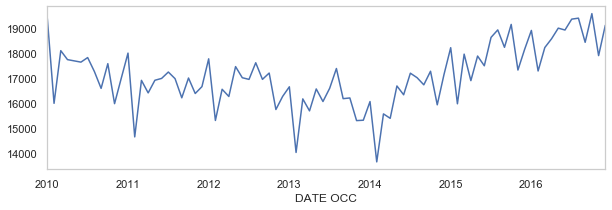

In [37]:
la_crime.resample('M').size().plot(figsize=(10,3));

In [30]:
firearms_desc = [
    'HAND GUN','AUTOMATIC WEAPON/SUB-MACHINE GUN','HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE','HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE',
    'ASSAULT WEAPON/UZI/AK47/ETC','STARTER PISTOL/REVOLVER','UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON','RELIC FIREARM','MAC-11 SEMIAUTOMATIC ASSAULT WEAPON',
    'M-14 SEMIAUTOMATIC ASSAULT RIFLE','M1-1 SEMIAUTOMATIC ASSAULT RIFLE'
]

In [33]:
firearm_crimes = la_crime[la_crime['Weapon Desc'].isin(firearms_desc)]

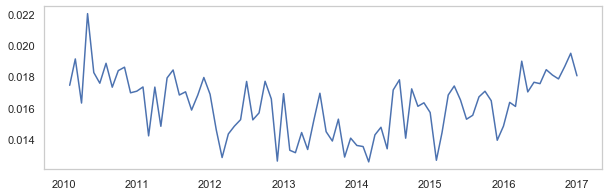

In [42]:
plt.figure(figsize=(10,3))
plt.plot(firearm_crimes.resample('M').size()/la_crime.resample('M').size());

### ———————————————————————————————————————

### Save/load data for work in progress

### ———————————————————————————————————————